[[2 1]
 [1 2]]


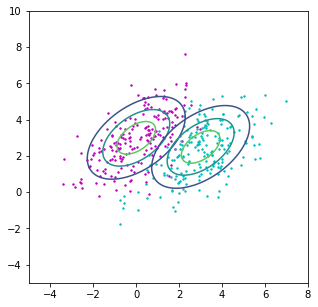

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 3]]
m2 = [[3, 2.5]]
C = np.array([[2, 1], [1, 2]])
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 10, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

nx, ny = 200, 200
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]])
m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]])
print(C2)
P1 = 0.5
P2 = 0.5

X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)


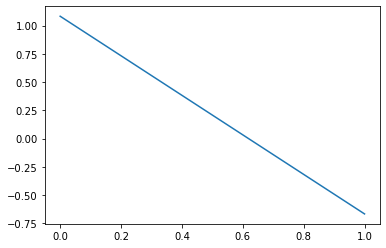

In [2]:
Ci = np.linalg.inv(2*C)
uF = Ci @ (m2 - m1)
plt.plot(uF)

(array([ 1.,  0.,  2.,  4.,  1.,  4.,  5.,  4.,  2.,  7.,  3.,  8., 11.,
        13.,  7.,  6.,  9., 11., 10., 12.,  6., 17.,  6.,  9.,  6.,  7.,
         4.,  2.,  9.,  4.,  2.,  2.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.]),
 array([-1.33975458, -1.1743501 , -1.00894562, -0.84354114, -0.67813666,
        -0.51273218, -0.3473277 , -0.18192322, -0.01651874,  0.14888574,
         0.31429022,  0.4796947 ,  0.64509918,  0.81050366,  0.97590814,
         1.14131262,  1.3067171 ,  1.47212158,  1.63752606,  1.80293054,
         1.96833502,  2.1337395 ,  2.29914398,  2.46454846,  2.62995294,
         2.79535742,  2.9607619 ,  3.12616638,  3.29157086,  3.45697534,
         3.62237982,  3.7877843 ,  3.95318878,  4.11859326,  4.28399774,
         4.44940222,  4.6148067 ,  4.78021118,  4.94561566,  5.11102014,
         5.27642462]),
 <BarContainer object of 40 artists>)

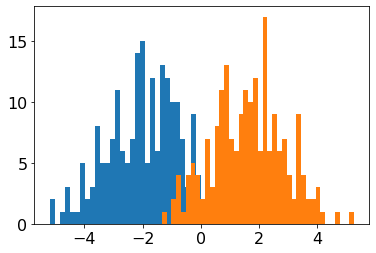

In [11]:
yp1 = (U1 @ A.T + m1) @ uF
yp2 = (U2 @ A.T + m2) @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins = 40)
plt.hist(yp2, bins = 40)

-5.19486826687306 5.276424623339461


-0.975025

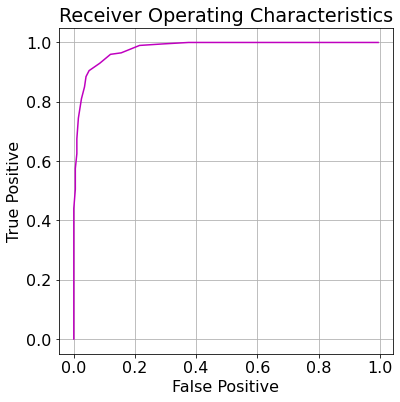

In [12]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh])  / len(yp2)
    FP = len(yp1[yp1 > thresh])  / len(yp1)
    ROC[i,:] = [FP, TP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(ROC[:,0], ROC[:,1], c = 'm')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve1.png')
np.trapz(ROC[:,1], ROC[:,0])